# Regresión Lineal

# Objetivos
- Conocer los fundamentos de la regresión lineal
- Analizar en detalle el método de mínimos cuadrados ordinarios
- Aplicar este método para generar modelos de regresión lineal
- Aprender puntuaciones de desempeño para evaluar cuantitativamente los modelos.

# Modelos lineales

## Formulación modelos lineales

Son modelos en donde la variable objetivo $\hat{y}$ se expresa como una **combinación lineal** de los atributos $x_{j}$ con pesos $w_{j}$:

\begin{split}
    \hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_m x_m
\end{split}

El entrenamiento consiste en "aprender" cuáles son los pesos $w_{j}$ óptimos para cada atributo a partir de un conjunto de datos

Evidentemente no tendrán buen desempeño si hay relaciones no lineales entre las variables.

## Algunos modelos lineales 
- Regresión lineal (mínimos cuadrados ordinarios)
- Regresión Ridge
- Regresión logística
- Regresión Lasso
- Regresión Bayesiana

# Regresión lineal (mínimos cuadrados ordinarios)

## Motivación práctica

Considerar el siguiente conjunto de datos para un molino de bolas:

<center>
    <img src="figures/molino.png" width="700"/>
</center>

Con un modelo lineal basado en mínimos cuadrados se podría estimar la eficiencia para determinada combinación de variables

En este caso RPM, Torque y Dureza serían atributos y Eficiencia sería la variable objetivo

## Concepto del método

<br><center>
    <img src="figures/mse-concept-1.png"  width="800"/>
</center>


## Formulación

Queremos construir un modelo tal que se pueda predecir la variable objetivo para cada muestra así:

\begin{split}
\hat{y_{1}} = w_{0} + w_{1} x_{11} + w_{2} x_{12} + ... + + w_{n} x_{1n}
\end{split}

\begin{split}
\hat{y_{2}} = w_{0} + w_{1} x_{21} + w_{2} x_{22} + ... + + w_{n} x_{2n}
\end{split}

\begin{split}
...
\end{split}

\begin{split}
\hat{y_{m}} = w_{0} + w_{1} x_{m1} + w_{2} x_{m2} + ... + + w_{n} x_{mn}
\end{split}

En notación matricial, $\mathbf{X}$ representa a cada uno de los $n$ atributos para cada una de las $m$ muestras del conjunto de datos:

\begin{split}
    \mathbf{X} = \begin{pmatrix} x_{11} & x_{12} & ... & x_{1n} \\ x_{21} & x_{22} & ... & x_{2n} \\ ... & ... & ... & ... \\ x_{m1} & x_{m2} & ... & x_{mn} \end{pmatrix}
\end{split}

$\mathbf{y}$ representa a la variable objetivo para cada una de las $m$ muestras del conjunto de datos:

\begin{split}
\mathbf{y} = \begin{pmatrix} y_{1} \\  y_{2} \\ ... \\ y_{m} \end{pmatrix}
\end{split}

$\mathbf{w}$ representa a los pesos que multiplican a cada uno de los $n$ atributos:

\begin{split}
\mathbf{w} = \begin{pmatrix} w_{1} \\ w_{2} \\ ... \\ w_{n} \end{pmatrix}
\end{split}

## Función de costo y solución

El modelo deberá ser tal que se pueda predecir $\mathbf{y}$ de la siguiente forma:

\begin{split}
    \mathbf{\hat{y}} = \mathbf{w}\mathbf{X}
\end{split}

Se deberán encontrar los pesos $\mathbf{w}$ que minimizen la siguiente función de costo:

\begin{split}
S(\mathbf{w}) = || \mathbf{y} - \mathbf{w}\mathbf{X} ||^2
\end{split}

En notación escalar esta función se escribe así:

\begin{split}
S(w_{j}) = \sum_{i=1}^{m} \left( y_{i} - \sum_{j=1}^{n} \left( w_{0} + w_{j} x_{ij} \right) \right)^{2}
\end{split}

Se puede demostrar que la solución $\mathbf{w}$ que minimiza a la función $S(\mathbf{w})$ para el conjunto de datos es:

\begin{split}
\mathbf{w} = (\mathbf{X^{T}} \mathbf{X)^{-1}} \mathbf{X^{T}} \mathbf{y} = \mathbf{P} \mathbf{y}
\end{split}

Donde $\mathbf{P} = (\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T}$ se conoce como matriz pseudoinversa

## Métrica de desempeño para regresión

El error que genera un modelo de regresión se puede medir con el error cuadrático medio (mean square error, MSE):

\begin{split}
MSE = \frac{1}{m} \sum_{i=1}^{m} \left( y_{i} - \hat{y_{i}} \right)^{2}
\end{split}

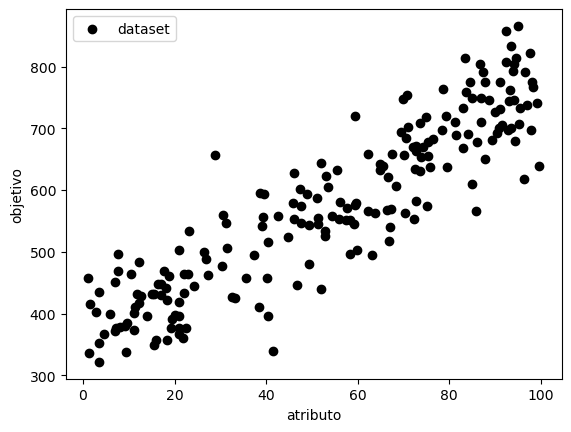

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def generate_dataset_offset(beta, n, std_dev): #funcion para  crear datos al azar pseudo-lineales
    np.random.seed(27)
    x = np.random.rand(n)*100.
    e = np.random.randn(n) * std_dev + 360
    y = x * beta + e
    return x, y

beta = 4.1
n = 200
std_dev=57.
X, y = generate_dataset_offset(beta, n, std_dev) #se genera el conjunto de datos
X = np.reshape(X, (len(X), 1))

plt.scatter(X, y, color='black', label='dataset')
plt.xlabel('atributo'), plt.ylabel('objetivo'), plt.legend()
plt.show()

Shapes X_train, y_train, X_test, y_test (180, 1) (180,) (20, 1) (20,)


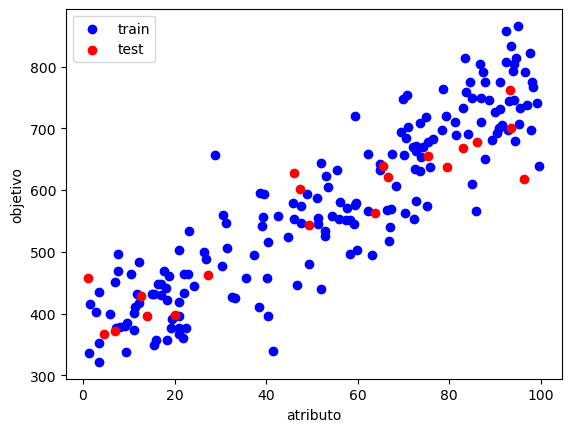

In [2]:
X_train = X[:-20] #atributos para entrenamiento
X_test = X[-20:] #atributos para test

y_train = y[:-20] #target para entrenamiento
y_test = y[-20:]  #target para test

print('Shapes X_train, y_train, X_test, y_test', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

plt.scatter(X_train, y_train, color='blue', label='train')
plt.scatter(X_test, y_test, color='red', label='test')
plt.xlabel('atributo'), plt.ylabel('objetivo'), plt.legend()
plt.show()

In [6]:
pinv = np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)), np.transpose(X_train)) #matriz pseudoinversa
w = np.dot(pinv, y_train) #calculo del vector de pesos
print('Valores w = ', w)
y_test_pred = w*X_test #calculo de la prediccion para datos de test


Valores w =  [9.18073353]


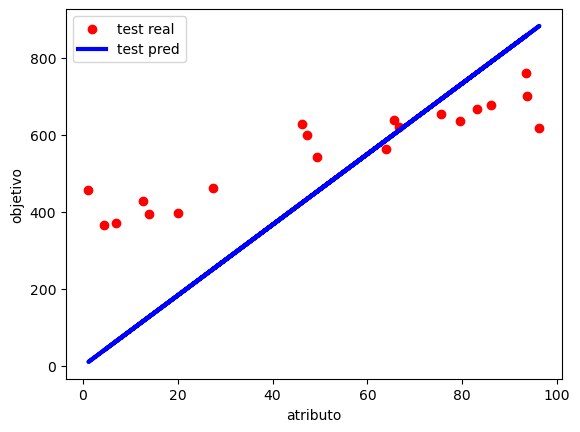

MSE =  43822.42469961875
Faltó agregar el coeficiente de posición!


In [7]:
from sklearn.metrics import mean_squared_error

plt.scatter(X_test, y_test, color="red", label='test real')
plt.plot(X_test, y_test_pred, color="blue", label='test pred', linewidth=3)
plt.xlabel('atributo'), plt.ylabel('objetivo')
plt.legend(), plt.show()
print('MSE = ', mean_squared_error(y_test, y_test_pred))

print('Faltó agregar el coeficiente de posición!')


In [8]:
ones = np.ones(len(X_train[:,0])) #vector de unos
X_train_ones = np.column_stack((ones, X_train)) #agregamos vector de unos al comienzo
print('Shape X_train_ones = ', X_train_ones.shape)
print('Ahora X tiene una columna con solo unos para representar al coeficiente de posición!')


Shape X_train_ones =  (180, 2)
Ahora X tiene una columna con solo unos para representar al coeficiente de posición!


In [9]:
pinv = np.linalg.pinv(X_train_ones) #pseudoinversa
w = pinv.dot(y_train) #vector de pesos
print('Valores w = ', w)
y_pred = w[0] + w[1]*X_test #calculo de la prediccion para datos de test


Valores w =  [351.90338279   4.17674734]


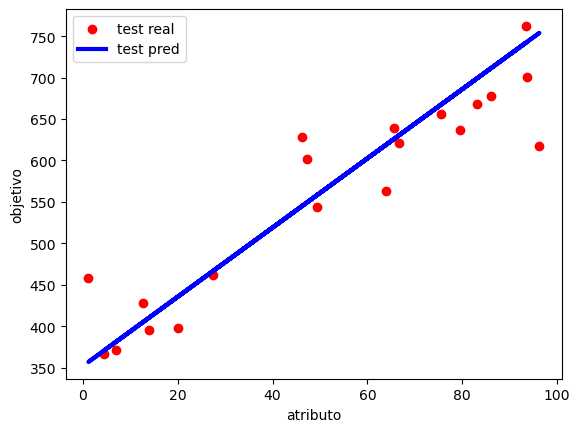

MSE =  2543.833634869317


In [10]:
plt.scatter(X_test, y_test, color="red", label='test real')
plt.plot(X_test, y_pred, color="blue", label='test pred', linewidth=3)
plt.xlabel('atributo'), plt.ylabel('objetivo')
plt.legend(), plt.show()
print('MSE = ', mean_squared_error(y_test, y_pred))


**Reflexión: ¿cómo saber si los valores de MSE son bajos o altos?**

## Regresión lineal en Scikit-Learn <br>


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [12]:
from sklearn.linear_model import LinearRegression

regre = LinearRegression() #creamos modelo inicial para regresion
regre.fit(X_train, y_train) #entrenamos modelo con datos de train

print("Pesos = ", regre.coef_)
print("Intercept = ", regre.intercept_)


Pesos =  [4.17674734]
Intercept =  351.9033827871462


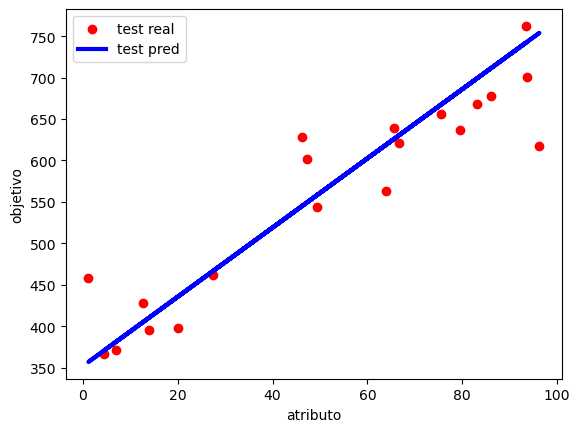

MSE =  2543.8336348693124


In [13]:
y_pred = regre.predict(X_test) #prediccion para datos de test

plt.scatter(X_test, y_test, color="red", label='test real')
plt.plot(X_test, y_pred, color="blue", label='test pred', linewidth=3)
plt.xlabel('atributo'), plt.ylabel('objetivo')
plt.legend(), plt.show()
print('MSE = ', mean_squared_error(y_test, y_pred))


# Ejemplo "Diabetes" 

- Cargar un set de datos para regresión pre-establecido
- Aplicación de mínimos cuadrados con varios atributos
- Análisis de errores de entrenamiento y test

<center>
    <img src="figures/diabetes.png" width="400"/>
</center>

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [14]:
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True, as_frame=True) #cargamos dataset con atributos "X" y target "y"
X.insert(10, "target", y)
display(X) #set de datos


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [17]:
from sklearn.model_selection import train_test_split

#subsets de entrenamiento y test
X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#entrenamiento del modelo
regre = LinearRegression()
regre.fit(X_train, y_train)
y_train_predict = regre.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_predict)
print('el error de entrenamiento es MSE = ', mse_train)

#test del modelo
y_test_predict = regre.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_predict)
print('el error de test es MSE = ', mse_test)


el error de entrenamiento es MSE =  2924.0463790726394
el error de test es MSE =  2821.750981001311


- Tener errores de entrenamiento y test (validación) parecidos es una buena señal, ya que indica que el modelo está balanceado entre el underfitting y el overfitting.

- Un error de test (validación) mucho más alto que el de entrenamiento es una señal de que existe overfitting, ya que el error de varianza es considerablemente más grande. El modelo está "demasiado ajustado" a los datos de entrenamiento.

- Un error de entrenamiento muy grande es una señal que el modelo sufre de underfitting, ya que no logra capturar bien la relación entre atributos y variables objetivos (error de sesgo)

In [30]:
print('**Predicciones específicas para datos de test**')
idx = 5
predict = regre.predict([X[idx]])

print('El valor verdadero es = ', y[idx])
print('El modelo predice = ', predict[0])


**Predicciones específicas para datos de test**
El valor verdadero es =  97.0
El modelo predice =  104.10666887996044


In [33]:
#Que pasa si usamos solo 1 de los 10 atributos?
X1 = X[:, 0] #usamos solo el atributo age
X1 = np.reshape(X1, (len(X1), 1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=42)

#entrenamiento del modelo
regre1 = LinearRegression()
regre1.fit(X1_train, y1_train)
y1_train_predict = regre1.predict(X1_train)
mse_train = mean_squared_error(y1_train, y1_train_predict)
print('el error de entrenamiento con 1 atributo es MSE = ', mse_train)

#test del modelo
y1_test_predict = regre1.predict(X1_test)
mse_test = mean_squared_error(y1_test, y1_test_predict)
print('el error de test con 1 atributo es MSE = ', mse_test)


el error de entrenamiento con 1 atributo es MSE =  5924.496728561793
el error de test con 1 atributo es MSE =  5256.092886182665


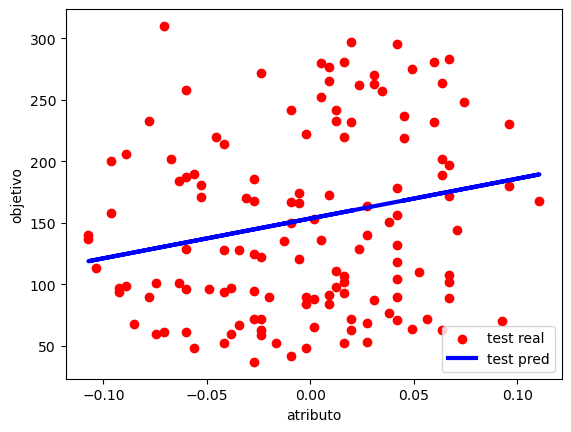

In [35]:
#visualizacion con 1 atributo
plt.scatter(X1_test, y1_test, color="red", label='test real')
plt.plot(X1_test, y1_test_predict, color="blue", label='test pred', linewidth=3)
plt.xlabel('atributo'), plt.ylabel('objetivo'), plt.legend()
plt.show()


# Sumario
- Los métodos lineales establecen relaciones del tipo combinación lineal entre atributos y variable objetivo
- El método de mínimos cuadrados utiliza una función de costo asociada al error medio cuadrático
- Scikit ofrece una manera sencilla y eficaz de aplicar este y otros métodos
